# Applying learned concepts to a more complex datasets
1. Why CIFAR - 10
   1. CIFAR-10 datasets is challenging benchmark dataset for image classification.It contains 60000 32*32 color images across 10 classes (e.g. airplane,car,bird,dog)
   2. Unlike MNIST,CIFAR 10 involves more complex patterns and requires robust neural network architectures

# Building and Optimizing a Neural Network for Image Classification
1. Key Steps:
   1. Preprocess the dataset for training (e.g. normalization,one-hot encoding)
   2. Define neural network with convolutional layers for feature extraction
   3. Optimize the network using techniques like learning rate adjustment and dropout

# Analyzing Model performance and Experimenting with Hyperparameters
1. Performance Analysis
   1. Evaluate accuracy and loss curves during training
   2. Use test set metrics to measures generalization
2. Experimentation
   1. Try different activation functions(e.g. ReLU,Tanh)
   2. Test Opitimizer like SGD,ADAM and RMSprop
   3. Adjust the learning rate and regularization techniqes (e.g. dropout,weight decay)

# Objectives
1. Build,train,and optimize a neural network for CIFAR-10 image classification,experimenting with hyperparameters to improve performance

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
import matplotlib.pyplot as plt

In [2]:
# loading CIFAR-10 Datasets
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [3]:
# Normalize pixel value to [0,1]
X_train=X_train.astype("float32")/255.0
X_test=X_test.astype("float32")/255.0

In [4]:
# One hot encoding target labels
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [5]:
print(f"Training Data Shape : {X_train.shape},{y_train.shape}")
print(f"Testing Data Shape : {X_test.shape},{y_test.shape}")

Training Data Shape : (50000, 32, 32, 3),(50000, 10)
Testing Data Shape : (10000, 32, 32, 3),(10000, 10)


In [7]:
# Define the baseline model
model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)),
    MaxPool2D(2,2),
    Conv2D(64,(3,3),activation="relu"),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),
    Dense(10,activation="softmax")
    
])

C:\Users\Suman Karki 29344\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
# compile the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [9]:
# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train baseline model
history=model.fit(
    X_train,y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 69ms/step - accuracy: 0.2908 - loss: 1.9065 - val_accuracy: 0.5053 - val_loss: 1.3893
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.4814 - loss: 1.4384 - val_accuracy: 0.5442 - val_loss: 1.2682
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.5302 - loss: 1.3047 - val_accuracy: 0.5773 - val_loss: 1.1606
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.5783 - loss: 1.1930 - val_accuracy: 0.6147 - val_loss: 1.0951
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.6011 - loss: 1.1311 - val_accuracy: 0.6507 - val_loss: 1.0034
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.6304 - loss: 1.0517 - val_accuracy: 0.6651 - val_loss: 0.9716
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.6482 - loss: 1.0053 - val_accuracy: 0.6755 - val_loss: 0.9245
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.6577 - loss: 0.9744 - 

In [12]:
# evaluate the baseline model
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"BaseLine model test accuracy : {accuracy:.4f}")


BaseLine model test accuracy : 0.6920


In [14]:
# define an  improved model
improved_model=Sequential([
    Conv2D(64,(5,5),activation="relu",input_shape=(32,32,3)),
    MaxPool2D(2,2),
    Conv2D(128,(5,5),activation="relu"),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(256,activation="relu"),
    Dropout(0.5),
    Dense(10,activation="softmax")
    
])

C:\Users\Suman Karki 29344\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
# Compile the imporved model with a learning rate scheduler
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
improved_model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [21]:
# Train impored_model
improved_history=improved_model.fit(
    X_train,y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 220ms/step - accuracy: 0.3096 - loss: 1.8634 - val_accuracy: 0.4925 - val_loss: 1.4104
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 213ms/step - accuracy: 0.4993 - loss: 1.3938 - val_accuracy: 0.5714 - val_loss: 1.2269
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 207ms/step - accuracy: 0.5621 - loss: 1.2241 - val_accuracy: 0.6230 - val_loss: 1.0777
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.6013 - loss: 1.1128 - val_accuracy: 0.6521 - val_loss: 1.0123
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 198ms/step - accuracy: 0.6375 - loss: 1.0220 - val_accuracy: 0.6515 - val_loss: 1.0080
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 187ms/step - accuracy: 0.6613 - loss: 0.9664 - val_accuracy: 0.6735 - val_loss: 0.9390
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 196ms/step - accuracy: 0.6859 - loss: 0.8891 - val_accuracy: 0.6819 - val_loss: 0.9278
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 199ms/step - accuracy: 0.7049 -

In [24]:
#Evaluate the imporved model
improved_loss,improved_accuracy=improved_model.evaluate(X_test,y_test,verbose=0)
print(f"Accuracy of imporved model is : {improved_accuracy:.4f}")

Accuracy of imporved model is : 0.6905


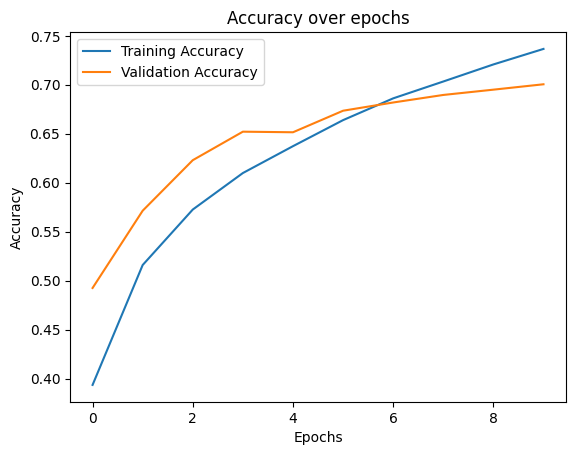

In [27]:
# Plotting training and validation accuracy
plt.plot(improved_history.history["accuracy"],label="Training Accuracy")
plt.plot(improved_history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

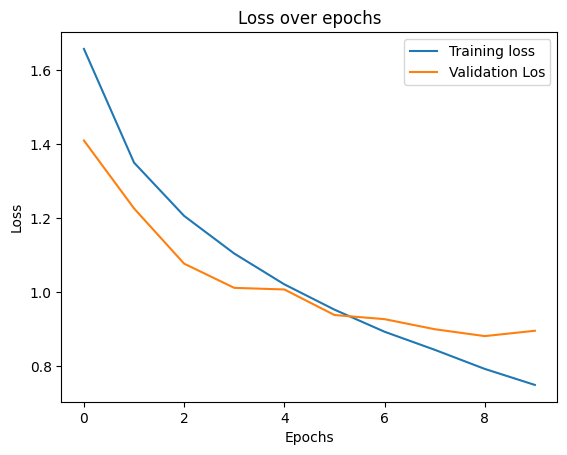

In [28]:
# plotting training and validation loss
plt.plot(improved_history.history["loss"],label="Training loss")
plt.plot(improved_history.history["val_loss"],label="Validation Los")
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()